### Advertising and Sales
Source: https://www.kaggle.com/sazid28/advertising.csv/downloads/advertising.csv.zip/1

Data Fields:

TV -- amount spend on TV ads on sales in dollars.   
radio -- amount spend on radio ads on sales in dollars.   
newspaper -- amount spend on newspaper ads on sales in dollars.   
sales --- sale in dollars.

In [ ]:
### Import libraries

In [270]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


### Import data file

In [271]:
data = pd.read_csv('Advertising.csv')

data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Data Shape

In [272]:
data.shape

(200, 5)

### Check for Null values

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Univariate Measures

In [274]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


### Visualize the Data

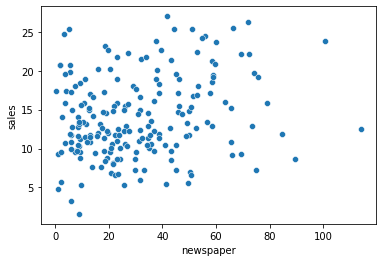

In [275]:
sns.scatterplot(data = data, x='newspaper', y = 'sales')

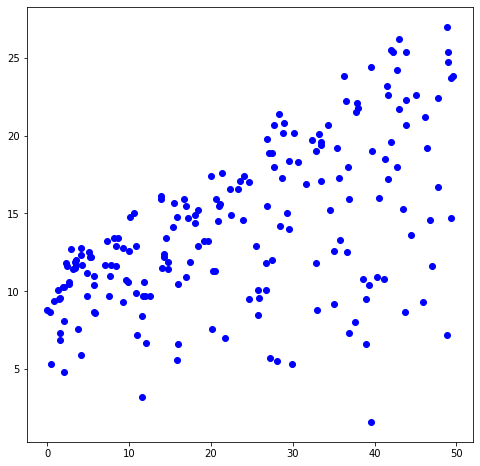

In [276]:

plt.figure(figsize=(8,8))

plt.scatter(data['radio'], data['sales'], c='b')

plt.show()

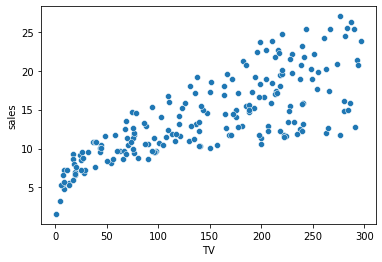

In [277]:
sns.scatterplot(data= data, x='TV', y = 'sales')

### Check for correlation

In [278]:
data_correlation = data.corr()
data_correlation

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


### Heatmap

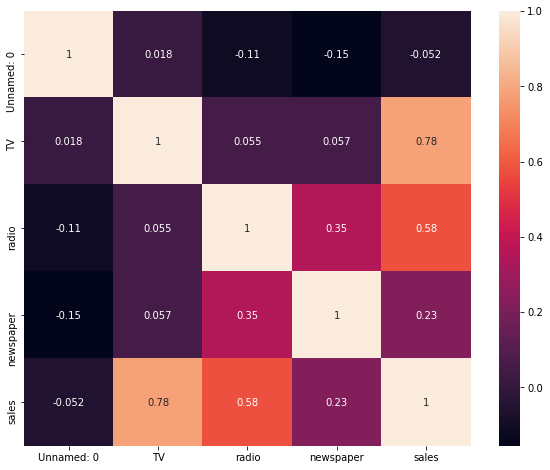

In [279]:
plt.subplots(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True)
plt.show()

### Linear Regression Function
Creating a function for Linear Regression Model fit on the data

In [280]:
def Linear_Regression(x_train, y_train):
    print("Linear Regression: ")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression

### Lasso Regression Function
Creating a function for Lasso Regression Model fit on the data

In [281]:
def Lasso_Regression(x_train, y_train):
    print("Lasso Regression: ")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    lasso_regression.fit(x_train, y_train)
    return lasso_regression

### Ridge Regression Function
Creating a function for Ridge Regression Model fit on the data

In [282]:
def Ridge_Regression(x_train, y_train):
    print("Ridge Regression: ")
    ridge_regression = Ridge(alpha=0.9)
    ridge_regression.fit(x_train, y_train)
    return ridge_regression

### Sochastic Gradient Descent Regression

Creating a function for Sochastic Gradient Descent Regression Model fit on the data

In [283]:
def SGD_Regressor(x_train, y_train):
    print("SGD Regression: ")
    sgd_regression = SGDRegressor(max_iter=2000)
    sgd_regression.fit(x_train, y_train)
    return sgd_regression

### Multilayer Preceptron Regresson

Creating a function for MLP Regressor Neural Network to fit the data. 3 Hidden layers, with 13 neurons each.

In [284]:
def MLP_Regressor(x_train, y_train):
    print("MLP Regressor: ")
    mlp_regressor = MLPRegressor(activation='relu', hidden_layer_sizes=(13,13,13), solver='lbfgs', verbose = True, max_iter= 20000)
    mlp_regressor.fit(x_train, y_train)
    return mlp_regressor

### Build and Train Model Function
Creating a Function for building, training and evaluating the model by using the train test split method where X is all variables but the median value and Y is target name = sales. The function preprocesses the data using standard scaler, trains the model ans print out the r2 score for accuracy, with the predicted values vs actual values.

In [285]:
def build_and_train_model(data, target_name, reg_fn):
    X = data.drop(target_name, axis=1)
    Y = data[target_name]
    x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)

    x_test = scaler.transform(x_test)

    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training score: ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)

    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))
    plt.figure(figsize=(10, 8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("medv of home")
    plt.legend()
    plt.show()

    return{'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred, 'sample' : df_y.sample(10)
            }





### Linear Regression Model fit Results
Utilizing the build and train model function to predict and score the Linear Regression algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

Linear Regression: 
Training score:  0.8981438967379421
Testing Score :  0.8908210628268897
     y_test     y_pred
94     11.5  10.561194
113    15.9  16.486071
9      10.6  12.837681
22      5.6   6.621126
89     16.7  16.920138
49      9.7   8.295169
35     12.8  17.296754
45     14.9  15.328668
97     15.5  15.427833
169    15.0  17.985891


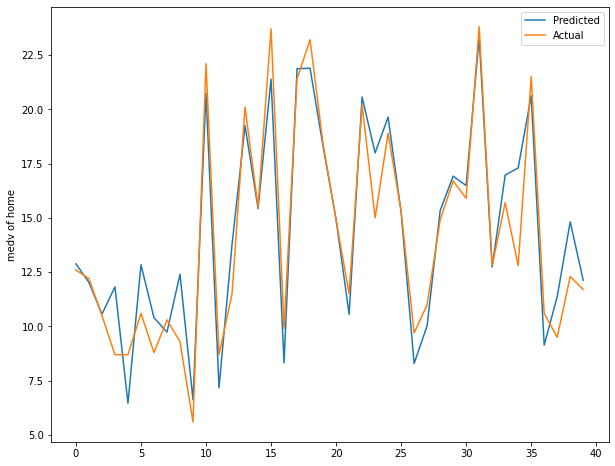

In [286]:
Linear_regression = build_and_train_model(data, "sales", Linear_Regression)

### Lasso Regression Model fit results

Utilizing the build and train model function to predict and score the Lasso Regression algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values. 

Lasso Regression: 
Training score:  0.846842717922854
Testing Score :  0.8298652711626737
     y_test     y_pred
184    17.6  17.691672
94     11.5  11.330144
101    23.8  21.186543
143    10.4  10.166694
44      8.5   9.771518
12      9.2  10.923340
58     23.8  19.709790
156    15.3  14.595534
179    12.6  12.977974
63     14.0  13.147382


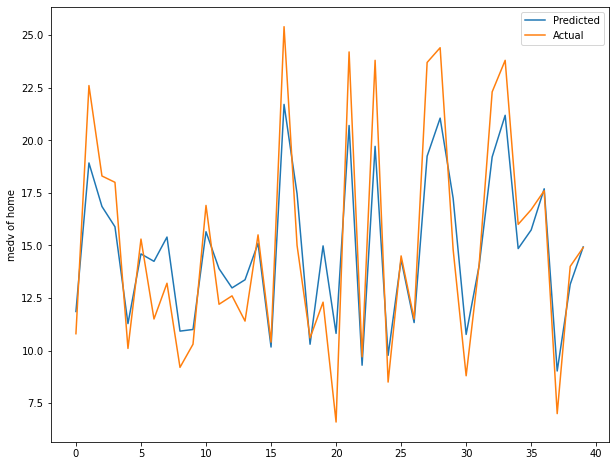

In [287]:
Lasso_regression = build_and_train_model(data, "sales", Lasso_Regression)

### Ridge Regression Model fit results

Utilizing the build and train model function to predict and score the Ridge Regression algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.

Ridge Regression: 
Training score:  0.9103137602769729
Testing Score :  0.8466533264964786
     y_test     y_pred
36     25.4  23.425095
37     14.7  15.867666
99     17.2  17.045138
146    13.2  15.176933
2       9.3  12.576307
156    15.3  15.539922
155     3.2   5.586872
97     15.5  15.339033
160    14.4  14.189831
124    19.7  19.296295


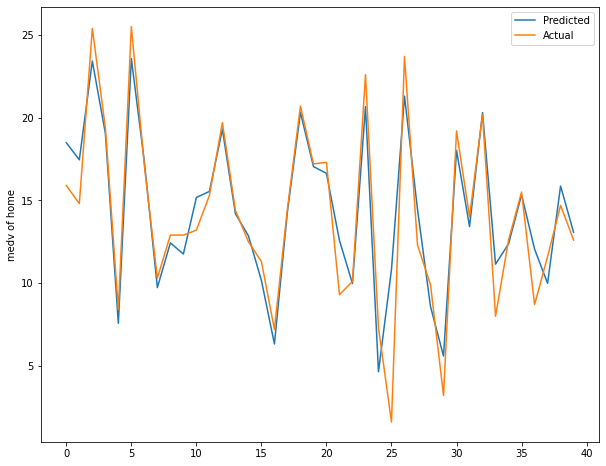

In [288]:
Ridge_regression = build_and_train_model(data, "sales", Ridge_Regression)

### Sochastic Gradient Descent Regression Model fit results

Utilizing the build and train model function to predict and score the Sochastic Gradient Descent Regression algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.

SGD Regression: 
Training score:  0.8997856227473011
Testing Score :  0.8825638436166223
     y_test     y_pred
82     11.3  10.269927
52     22.6  20.568848
161    13.3  13.374821
26     15.0  15.021749
12      9.2  10.697798
35     12.8  17.303274
72      8.8  10.296956
16     12.5  13.034581
192     5.9   4.558235
69     22.3  20.930125


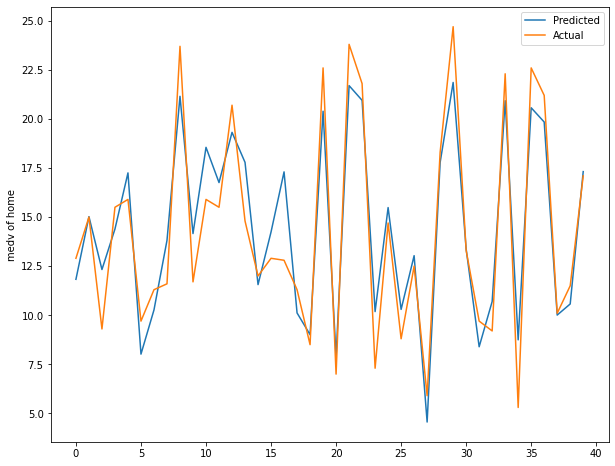

In [289]:
SGD_regression = build_and_train_model(data, "sales", SGD_Regressor)

### Multilayer Preceptron Regression Neural Network model fit results

Utilizing the build and train model function to predict and score the Multilayer Preceptron Regression Neural Network algorithm on the data. 3 inputs as needed: data file, value to predict(price), and the type of model below. Results in order Training score, Testing/r2 score to predict accuracy, and the Y_test: actual values and Y_pred = predicted values.

MLP Regressor: 
Training score:  0.999940226592664
Testing Score :  0.9864003962050619
     y_test     y_pred
48     14.8  14.768294
199    13.4  12.645463
189     6.7   8.202843
168    17.1  16.387166
146    13.2  12.580480
186    10.3  10.023125
65      9.3  10.602316
156    15.3  15.157875
38     10.1   9.675136
46     10.6  10.385071


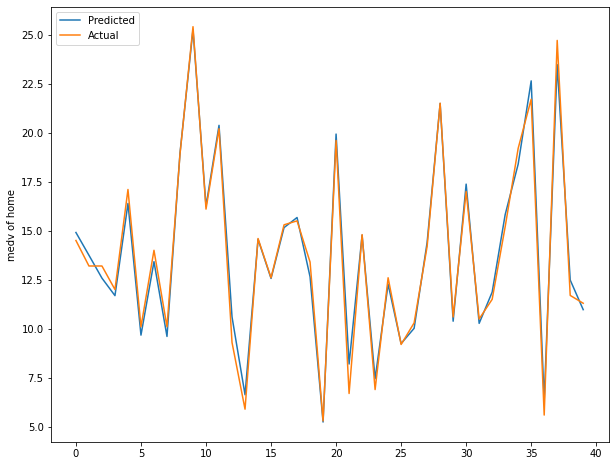

In [290]:
MLP_Regression = build_and_train_model(data, "sales", MLP_Regressor)